In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset Shape: (614, 13)

First few rows:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0       

In [6]:
# Step 1: Data Exploration and Understanding
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDataset Description:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Missing Values:
Loan_ID               0
Gender               13
Married               3
Depe

In [8]:
# Step 2: Handle Missing Data
def handle_missing_data(df):
    df_clean = df.copy()
    
    # Display missing values before handling
    print("Missing values before handling:")
    print(df_clean.isnull().sum())
    
    # Handle categorical variables
    categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
    for col in categorical_cols:
        if col in df_clean.columns:
            if df_clean[col].dtype == 'object':
                df_clean[col].fillna(df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown', inplace=True)
            else:
                df_clean[col].fillna(df_clean[col].median(), inplace=True)
    
    # Handle numerical variables
    numerical_cols = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']
    for col in numerical_cols:
        if col in df_clean.columns:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
    
    print("\nMissing values after handling:")
    print(df_clean.isnull().sum())
    
    return df_clean

df_clean = handle_missing_data(df)

Missing values before handling:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values after handling:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


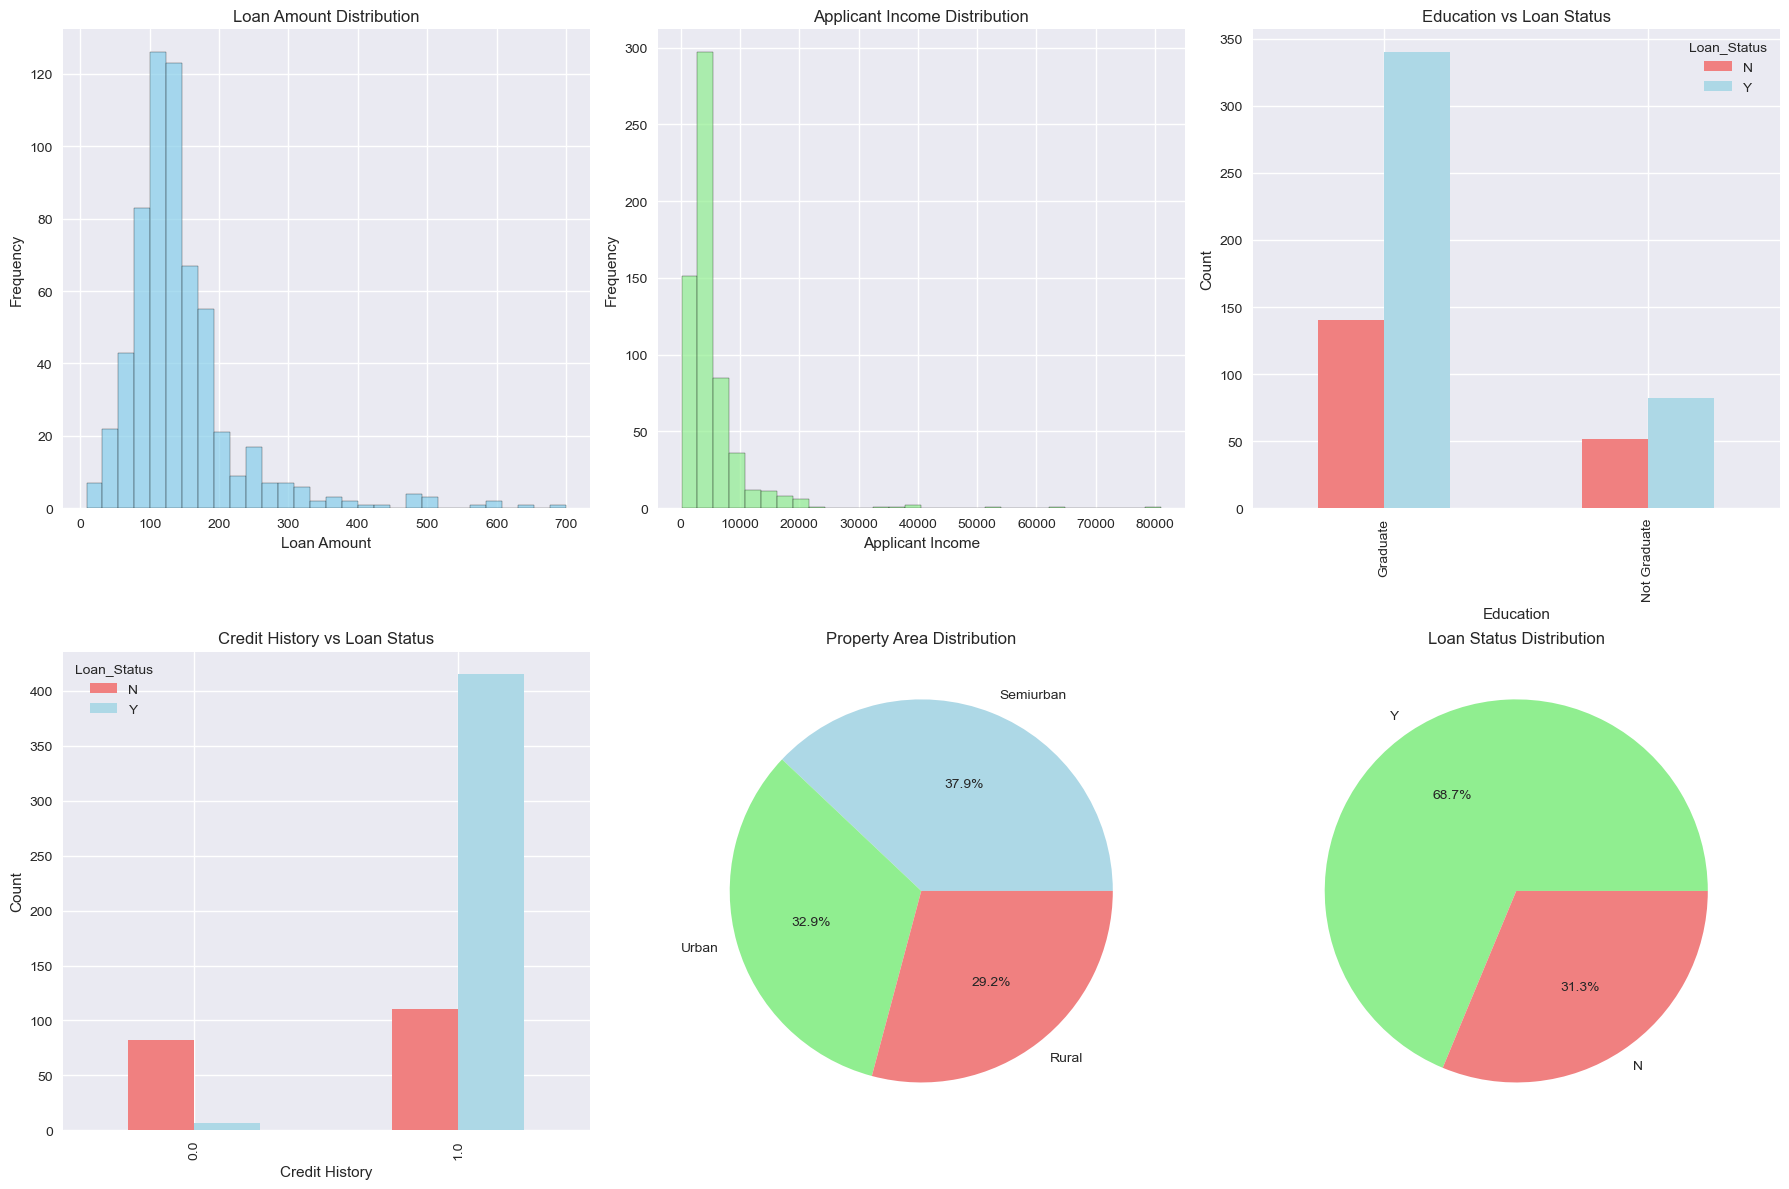

In [10]:
# Step 3: Exploratory Data Analysis (EDA)

# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 3.1 Loan Amount Distribution
axes[0,0].hist(df_clean['LoanAmount'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Loan Amount Distribution')
axes[0,0].set_xlabel('Loan Amount')
axes[0,0].set_ylabel('Frequency')

# 3.2 Applicant Income Distribution
axes[0,1].hist(df_clean['ApplicantIncome'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Applicant Income Distribution')
axes[0,1].set_xlabel('Applicant Income')
axes[0,1].set_ylabel('Frequency')

# 3.3 Education vs Loan Status
education_loan = pd.crosstab(df_clean['Education'], df_clean['Loan_Status'])
education_loan.plot(kind='bar', ax=axes[0,2], color=['lightcoral', 'lightblue'])
axes[0,2].set_title('Education vs Loan Status')
axes[0,2].set_xlabel('Education')
axes[0,2].set_ylabel('Count')

# 3.4 Credit History vs Loan Status
credit_loan = pd.crosstab(df_clean['Credit_History'], df_clean['Loan_Status'])
credit_loan.plot(kind='bar', ax=axes[1,0], color=['lightcoral', 'lightblue'])
axes[1,0].set_title('Credit History vs Loan Status')
axes[1,0].set_xlabel('Credit History')
axes[1,0].set_ylabel('Count')

# 3.5 Property Area Distribution
property_area = df_clean['Property_Area'].value_counts()
axes[1,1].pie(property_area.values, labels=property_area.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
axes[1,1].set_title('Property Area Distribution')

# 3.6 Loan Status Distribution
loan_status = df_clean['Loan_Status'].value_counts()
axes[1,2].pie(loan_status.values, labels=loan_status.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axes[1,2].set_title('Loan Status Distribution')

plt.tight_layout()
plt.show()

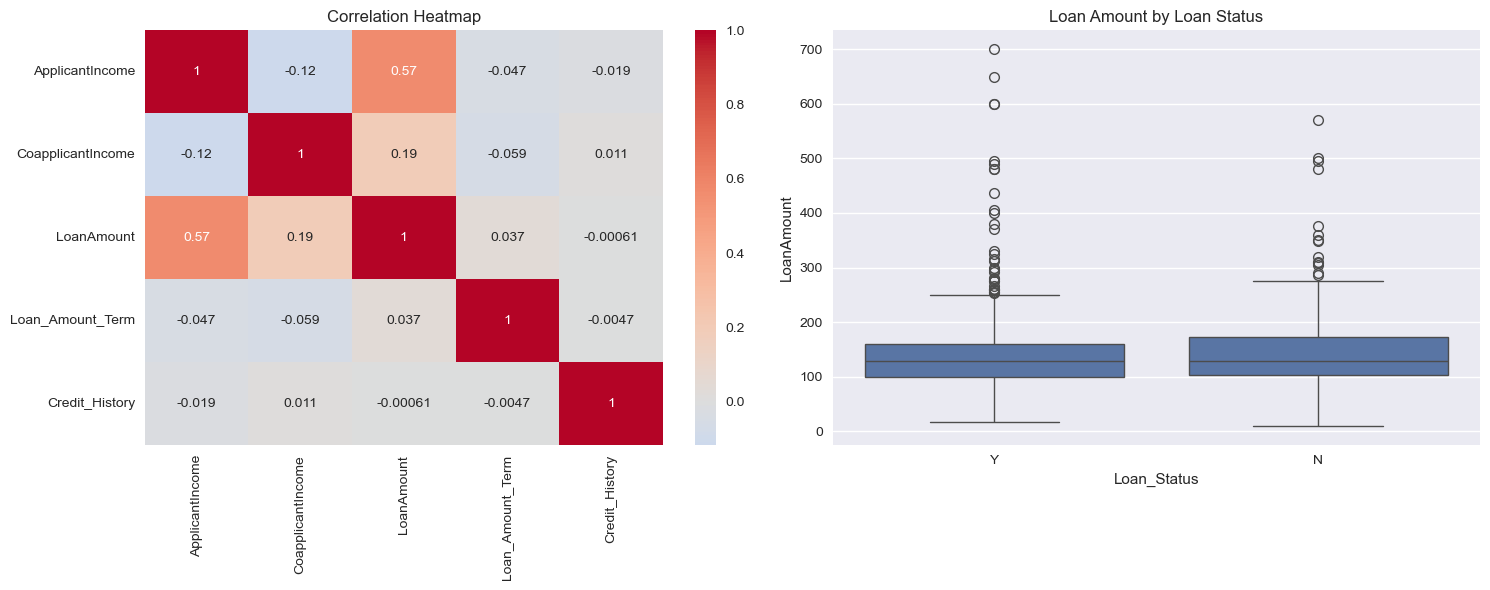

In [12]:
# Additional EDA: Correlation heatmap and box plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Correlation heatmap for numerical variables
numerical_df = df_clean[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0])
axes[0].set_title('Correlation Heatmap')

# Box plot: Loan Amount by Loan Status
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df_clean, ax=axes[1])
axes[1].set_title('Loan Amount by Loan Status')

plt.tight_layout()
plt.show()

In [14]:
# Step 4: Data Preprocessing for Machine Learning

def preprocess_data(df):
    df_processed = df.copy()
    
    # Drop Loan_ID as it's not useful for prediction
    if 'Loan_ID' in df_processed.columns:
        df_processed = df_processed.drop('Loan_ID', axis=1)
    
    # Encode categorical variables
    categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
    label_encoders = {}
    
    for col in categorical_cols:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le
    
    # Encode target variable
    df_processed['Loan_Status'] = LabelEncoder().fit_transform(df_processed['Loan_Status'])
    
    return df_processed, label_encoders

df_processed, label_encoders = preprocess_data(df_clean)

print("Processed Dataset Info:")
print(df_processed.info())
print("\nProcessed Dataset Head:")
print(df_processed.head())

Processed Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB
None

Processed Dataset Head:
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0 

In [16]:
# Step 5: Prepare Data for Modeling

# Define features and target
X = df_processed.drop('Loan_Status', axis=1)
y = df_processed['Loan_Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Target distribution in training set: {np.bincount(y_train)}")
print(f"Target distribution in test set: {np.bincount(y_test)}")

Training set size: (491, 11)
Test set size: (123, 11)
Target distribution in training set: [154 337]
Target distribution in test set: [38 85]


In [18]:
# Step 6: Train Multiple Classification Models

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    if name == 'Logistic Regression':
        # Use scaled data for Logistic Regression
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)
    else:
        # Use unscaled data for tree-based models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'probabilities': y_pred_proba
    }
    
    print(f"{name} Accuracy: {accuracy:.4f}")


Training Logistic Regression...
Logistic Regression Accuracy: 0.8618

Training Decision Tree...
Decision Tree Accuracy: 0.7642

Training Random Forest...
Random Forest Accuracy: 0.8293


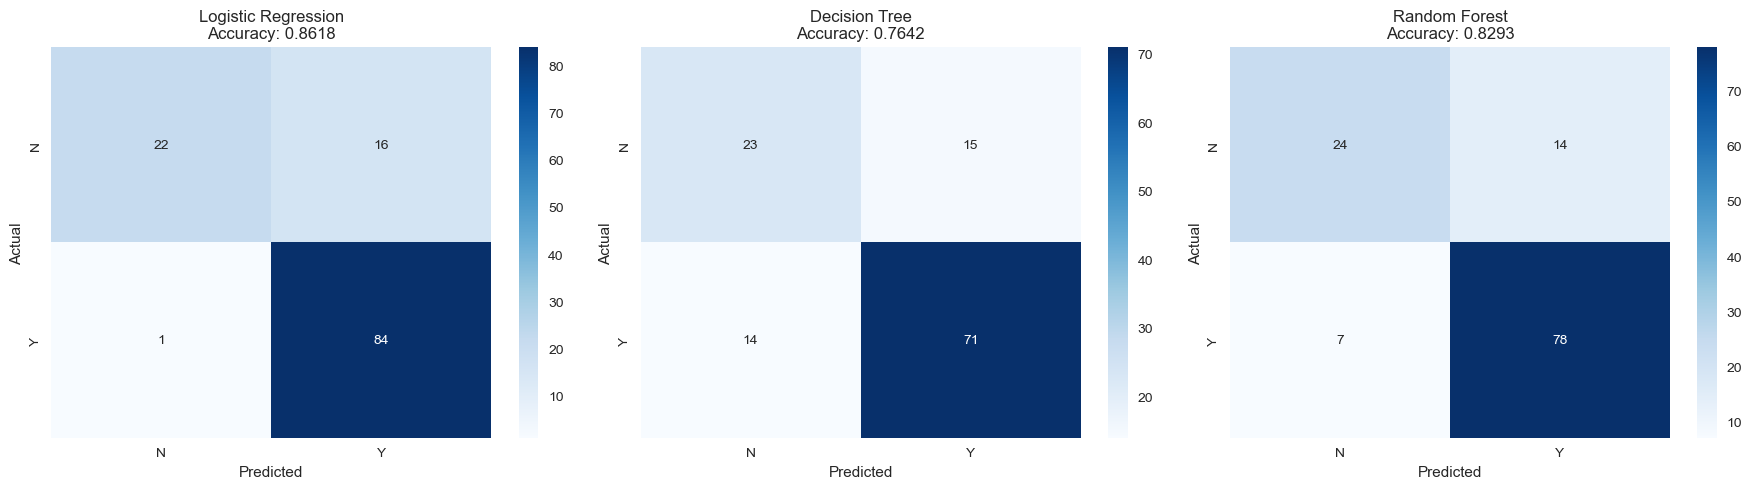

In [20]:
# Step 7: Model Evaluation and Comparison

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, result) in enumerate(results.items()):
    cm = result['confusion_matrix']
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name}\nAccuracy: {result["accuracy"]:.4f}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xticklabels(['N', 'Y'])
    axes[idx].set_yticklabels(['N', 'Y'])

plt.tight_layout()
plt.show()

In [22]:
# Detailed model comparison
print("MODEL COMPARISON SUMMARY")
print("=" * 50)

for name, result in results.items():
    print(f"\n{name}:")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    
    cm = result['confusion_matrix']
    tn, fp, fn, tp = cm.ravel()
    
    print(f"  True Positives: {tp}")
    print(f"  True Negatives: {tn}")
    print(f"  False Positives: {fp}")
    print(f"  False Negatives: {fn}")
    
    # Calculate additional metrics
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1_score:.4f}")

# Find the best model
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
print(f"\n{'='*50}")
print(f"BEST MODEL: {best_model_name} with accuracy: {results[best_model_name]['accuracy']:.4f}")

MODEL COMPARISON SUMMARY

Logistic Regression:
  Accuracy: 0.8618
  True Positives: 84
  True Negatives: 22
  False Positives: 16
  False Negatives: 1
  Precision: 0.8400
  Recall: 0.9882
  F1-Score: 0.9081

Decision Tree:
  Accuracy: 0.7642
  True Positives: 71
  True Negatives: 23
  False Positives: 15
  False Negatives: 14
  Precision: 0.8256
  Recall: 0.8353
  F1-Score: 0.8304

Random Forest:
  Accuracy: 0.8293
  True Positives: 78
  True Negatives: 24
  False Positives: 14
  False Negatives: 7
  Precision: 0.8478
  Recall: 0.9176
  F1-Score: 0.8814

BEST MODEL: Logistic Regression with accuracy: 0.8618


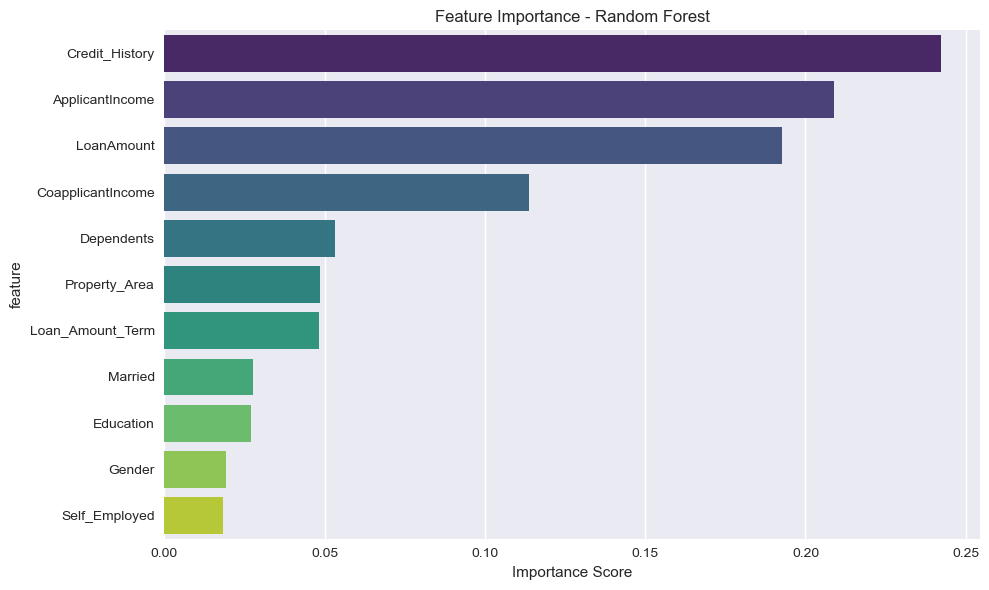

Top 5 Most Important Features:
             feature  importance
9     Credit_History    0.242296
5    ApplicantIncome    0.209001
7         LoanAmount    0.192555
6  CoapplicantIncome    0.113800
2         Dependents    0.053360


In [24]:
# Step 8: Feature Importance Analysis (for tree-based models)

if 'Random Forest' in results:
    best_model = results['Random Forest']['model']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
    plt.title('Feature Importance - Random Forest')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()
    
    print("Top 5 Most Important Features:")
    print(feature_importance.head())

In [34]:
# Step 9: Create a comprehensive prediction function

def predict_loan_risk(model, scaler, input_data, label_encoders=None):
    """
    Predict loan risk for new applicants with robust error handling
    """
    # Create a copy of input data
    prediction_data = input_data.copy()
    
    # Encode categorical variables if encoders are provided
    if label_encoders:
        for col, encoder in label_encoders.items():
            if col in prediction_data.columns:
                # Handle unseen labels safely
                current_values = prediction_data[col].astype(str)
                # Replace unseen labels with the most common one from training
                mask = ~current_values.isin(encoder.classes_)
                if mask.any():
                    most_common = encoder.classes_[0]  # Use first class as default
                    prediction_data.loc[mask, col] = most_common
                    print(f"Warning: Replaced {mask.sum()} unseen values in '{col}' with '{most_common}'")
                prediction_data[col] = encoder.transform(prediction_data[col].astype(str))
    
    # Ensure all columns are numeric and handle any remaining issues
    for col in prediction_data.columns:
        prediction_data[col] = pd.to_numeric(prediction_data[col], errors='coerce')
    
    # Fill any NaN values with 0
    prediction_data = prediction_data.fillna(0)
    
    # Ensure the columns are in the same order as training
    prediction_data = prediction_data[X_train.columns]
    
    # Scale the data if it's Logistic Regression
    if hasattr(model, 'coef_'):  # Logistic Regression
        prediction_data_scaled = scaler.transform(prediction_data)
        prediction = model.predict(prediction_data_scaled)
        probability = model.predict_proba(prediction_data_scaled)
    else:
        prediction = model.predict(prediction_data)
        probability = model.predict_proba(prediction_data)
    
    return prediction, probability

# Let's first check what's happening with our data
print("Debugging information:")
print(f"X_train columns: {X_train.columns.tolist()}")
print(f"sample_test columns: {sample_test.columns.tolist()}")
print(f"Label encoders available for: {list(label_encoders.keys())}")

# Check data types and unique values
print("\nData inspection:")
for col in sample_test.columns:
    if col in label_encoders:
        print(f"{col}: {sample_test[col].dtype}, unique values: {sample_test[col].unique()}")
        print(f"  Encoder classes: {label_encoders[col].classes_}")

# Reset indices to avoid alignment issues
sample_test_fixed = sample_test.reset_index(drop=True)
true_labels_fixed = true_labels.reset_index(drop=True)

print(f"\nSample test shape: {sample_test_fixed.shape}")
print(f"True labels shape: {true_labels_fixed.shape}")

# Now try the prediction
try:
    predictions, probabilities = predict_loan_risk(best_model, scaler, sample_test_fixed, label_encoders)
    
    print("\n" + "="*60)
    print("PREDICTION RESULTS")
    print("="*60)
    
    for i, (actual, pred, prob) in enumerate(zip(true_labels_fixed, predictions, probabilities)):
        status_actual = 'Approved' if actual == 1 else 'Rejected'
        status_pred = 'Approved' if pred == 1 else 'Rejected'
        confidence = prob[pred]
        prob_approved = prob[1]
        prob_rejected = prob[0]
        
        print(f"\nSample {i+1}:")
        print(f"  Actual: {status_actual}")
        print(f"  Predicted: {status_pred}")
        print(f"  Confidence: {confidence:.4f}")
        print(f"  Approval Probability: {prob_approved:.4f}")
        print(f"  Rejection Probability: {prob_rejected:.4f}")
        print(f"  Result: {'✓ CORRECT' if actual == pred else '✗ INCORRECT'}")
        
except Exception as e:
    print(f"Error during prediction: {str(e)}")
    print(f"Error type: {type(e).__name__}")
    
    # More detailed debugging
    print("\nDetailed debugging:")
    print("1. Checking for data type issues...")
    for col in sample_test_fixed.columns:
        print(f"   {col}: {sample_test_fixed[col].dtype}, sample values: {sample_test_fixed[col].iloc[:2].tolist()}")

Debugging information:
X_train columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
sample_test columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Label encoders available for: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

Data inspection:
Gender: int32, unique values: [1 0]
  Encoder classes: ['Female' 'Male']
Married: int32, unique values: [0 1]
  Encoder classes: ['No' 'Yes']
Dependents: int32, unique values: [0 1]
  Encoder classes: ['0' '1' '2' '3+']
Education: int32, unique values: [0]
  Encoder classes: ['Graduate' 'Not Graduate']
Self_Employed: int32, unique values: [0 1]
  Encoder classes: ['No' 'Yes']
Property_Area: int32, unique values: [0 1]
  Encoder classes: ['Rural' 'Semiurb